In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")

BASE_DIR = Path("..")
PROCESSED_DIR = BASE_DIR / "processed"

# Cargar dataset con coherencia predictiva (salida del libro 04)
data_path = PROCESSED_DIR / "suelos_coherencia.csv"
print("Cargando datos desde:", data_path.resolve())

df = pd.read_csv(data_path)
print("Dataset cargado:", df.shape)
df.head()


Cargando datos desde: D:\ICD-SOIL\processed\suelos_coherencia.csv
Dataset cargado: (35111, 63)


C:\Users\diego\AppData\Local\Temp\ipykernel_12120\2373860445.py:16: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


,secuencial,fecha_de_an_lisis,departamento,municipio,cultivo,estado,tiempo_de_establecimiento,topografia,drenaje,riego,...,icd_predictivo_sodio_intercambiable,icd_predictivo_cic,icd_predictivo_conductividad_electrica,icd_predictivo_hierro_olsen,icd_predictivo_cobre_disponible,icd_predictivo_manganeso_olsen,icd_predictivo_zinc_olsen,icd_predictivo_boro_disponible,icd_predictivo_hierro_doble_acido,icd_predictivo_manganeso_doble_acido
0,1,2014-07-01,NARIÑO,SAN ANDRÉS DE TUMACO,No Indica,No indica,No indica,No indica,No indica,No indica,...,0.785379,0.955959,0.975207,0.876265,0.878433,0.827458,0.935726,0.936786,NaN,NaN
1,164,2014-05-09,CUNDINAMARCA,UNE,Lulo,Establecido,De 0 a 1 año,Plano,Buen drenaje,Aspersión,...,0.913592,0.981955,0.872979,0.805643,0.977212,0.962776,0.944802,0.787208,NaN,NaN
2,165,2014-05-09,CUNDINAMARCA,UNE,Lulo,Establecido,De 0 a 1 año,Ondulado,Buen drenaje,Aspersión,...,0.950052,0.853240,0.918891,0.678192,0.881316,0.978700,0.894145,0.461749,NaN,NaN
3,166,2014-05-09,CUNDINAMARCA,FUNZA,Guisantes,Por establecer,No indica,Plano,Buen drenaje,Goteo,...,0.874170,0.953051,0.868227,0.930254,0.983721,0.777359,0.230549,0.848395,NaN,NaN
4,167,2014-05-09,VALLE DEL CAUCA,LA UNIÓN,Guanábana,Establecido,Mas de 10 años,Plano,Buen drenaje,Manguera,...,0.512625,0.497408,0.000000,0.996966,0.979277,0.955064,0.942224,0.000000,NaN,NaN


In [2]:
# Detectar todas las columnas que representan ICD predictivo
icd_cols = [c for c in df.columns if c.startswith("icd_predictivo_")]

print(f"Columnas ICD predictivo encontradas ({len(icd_cols)}):")
icd_cols[:10]


Columnas ICD predictivo encontradas (19):


['icd_predictivo_ph_agua_suelo',
 'icd_predictivo_materia_organica',
 'icd_predictivo_fosforo_bray_ii',
 'icd_predictivo_azufre_fosfato_monocalcico',
 'icd_predictivo_acidez_intercambiable',
 'icd_predictivo_aluminio_intercambiable',
 'icd_predictivo_calcio_intercambiable',
 'icd_predictivo_magnesio_intercambiable',
 'icd_predictivo_potasio_intercambiable',
 'icd_predictivo_sodio_intercambiable']

In [3]:
# Resumen estadístico de ICD predictivo por variable de suelo
resumen_icd = []

for col in icd_cols:
    serie = df[col]
    resumen_icd.append({
        "variable": col.replace("icd_predictivo_", ""),
        "count": int(serie.notna().sum()),
        "mean_icd": float(serie.mean(skipna=True)),
        "std_icd": float(serie.std(skipna=True)),
        "min_icd": float(serie.min(skipna=True)),
        "p25_icd": float(serie.quantile(0.25)),
        "p50_icd": float(serie.quantile(0.50)),
        "p75_icd": float(serie.quantile(0.75)),
        "max_icd": float(serie.max(skipna=True)),
    })

df_resumen_icd = pd.DataFrame(resumen_icd).sort_values("mean_icd", ascending=False)
df_resumen_icd


,variable,count,mean_icd,std_icd,min_icd,p25_icd,p50_icd,p75_icd,max_icd
9,sodio_intercambiable,17687,0.807426,0.251393,0.0,0.781241,0.904342,0.960056,1.000000
2,fosforo_bray_ii,28981,0.794357,0.259475,0.0,0.752673,0.899893,0.958944,0.999987
3,azufre_fosfato_monocalcico,34438,0.789069,0.255859,0.0,0.747548,0.887567,0.952059,0.999999
7,magnesio_intercambiable,33356,0.787916,0.258760,0.0,0.740648,0.888831,0.956094,0.999993
10,cic,35087,0.785542,0.255795,0.0,0.737858,0.881995,0.951409,1.000000
11,conductividad_electrica,34753,0.784476,0.257775,0.0,0.733384,0.884018,0.952760,1.000000
15,zinc_olsen,20462,0.780364,0.256121,0.0,0.729282,0.879334,0.945209,0.999992
6,calcio_intercambiable,32902,0.773862,0.260177,0.0,0.717311,0.873529,0.946315,1.000000
17,hierro_doble_acido,1698,0.773546,0.262108,0.0,0.708267,0.872815,0.953144,0.999950
12,hierro_olsen,32638,0.772480,0.267957,0.0,0.694232,0.879979,0.960978,0.999999


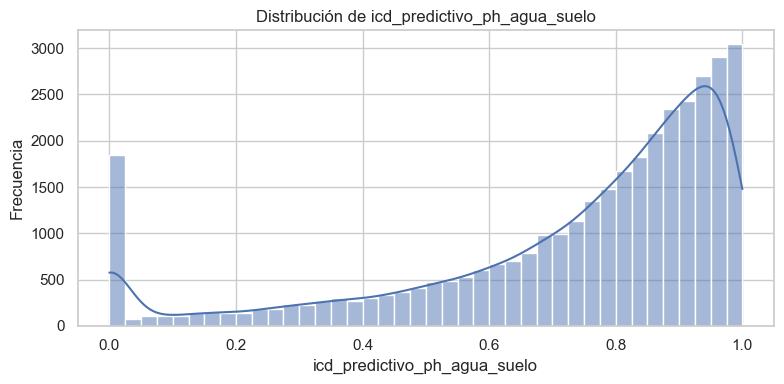

In [4]:
# Elegimos una variable para inspeccionar su distribución de ICD predictivo
col_plot = "icd_predictivo_ph_agua_suelo"  # puedes cambiarla por otra de icd_cols

if col_plot in icd_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col_plot].dropna(), bins=40, kde=True)
    plt.title(f"Distribución de {col_plot}")
    plt.xlabel(col_plot)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()
else:
    print(f"La columna {col_plot} no está en el dataframe.")


In [5]:
# Determinar columna de agrupación territorial
group_col = None
if "dep_norm" in df.columns:
    group_col = "dep_norm"
elif "departamento" in df.columns:
    group_col = "departamento"

if group_col is None:
    raise ValueError("No se encontró ni 'dep_norm' ni 'departamento' en el dataframe.")

print("Agrupando coherencia por columna territorial:", group_col)


Agrupando coherencia por columna territorial: departamento


In [6]:
# Promedio de ICD predictivo por departamento (promedio de todas las variables)
df_coh_depto = (
    df.groupby(group_col)[icd_cols]
      .mean()
      .reset_index()
)

df_coh_depto.head()


,departamento,icd_predictivo_ph_agua_suelo,icd_predictivo_materia_organica,icd_predictivo_fosforo_bray_ii,icd_predictivo_azufre_fosfato_monocalcico,icd_predictivo_acidez_intercambiable,icd_predictivo_aluminio_intercambiable,icd_predictivo_calcio_intercambiable,icd_predictivo_magnesio_intercambiable,icd_predictivo_potasio_intercambiable,icd_predictivo_sodio_intercambiable,icd_predictivo_cic,icd_predictivo_conductividad_electrica,icd_predictivo_hierro_olsen,icd_predictivo_cobre_disponible,icd_predictivo_manganeso_olsen,icd_predictivo_zinc_olsen,icd_predictivo_boro_disponible,icd_predictivo_hierro_doble_acido,icd_predictivo_manganeso_doble_acido
0,AMAZONAS,0.734652,0.784198,0.875913,0.774798,0.373546,0.379341,0.655290,0.829179,0.835318,0.858376,0.656837,0.890130,0.700703,0.749049,0.458763,0.745518,0.692205,NaN,NaN
1,ANTIOQUIA,0.760544,0.696656,0.795127,0.747912,0.748662,0.756940,0.765384,0.810981,0.747886,0.815332,0.782329,0.775426,0.710045,0.743450,0.734681,0.741026,0.708813,NaN,NaN
2,ARAUCA,0.783347,0.795029,0.810339,0.864108,0.817856,0.832812,0.852844,0.854823,0.844879,0.795979,0.859817,0.886128,0.876082,0.830205,0.712610,0.861273,0.792291,0.728129,0.595476
3,ATLÁNTICO,0.599373,0.835905,0.755779,0.633599,0.913015,0.925704,0.618078,0.624661,0.744959,0.511818,0.650196,0.603927,0.916899,0.808415,0.772717,0.857380,0.698708,NaN,NaN
4,"BOGOTÁ, D.C.",0.710259,0.654637,0.780639,0.781806,0.649401,0.657036,0.719482,0.719559,0.674573,0.799435,0.747770,0.764742,0.724917,0.736808,0.731393,0.740603,0.719667,NaN,NaN


In [7]:
# Crear un ICD predictivo promedio global por departamento
df_coh_depto["icd_predictivo_promedio"] = df_coh_depto[icd_cols].mean(axis=1, skipna=True)

ranking_deptos = (
    df_coh_depto[[group_col, "icd_predictivo_promedio"]]
    .sort_values("icd_predictivo_promedio", ascending=False)
)

ranking_deptos.head(10)


,departamento,icd_predictivo_promedio
31,VICHADA,0.879976
20,META,0.827937
15,GUAINÍA,0.823442
8,CAQUETÁ,0.821493
2,ARAUCA,0.810212
16,GUAVIARE,0.800891
10,CAUCA,0.799553
21,NARIÑO,0.797700
7,CALDAS,0.794438
23,PUTUMAYO,0.791457


C:\Users\diego\AppData\Local\Temp\ipykernel_12120\412153880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


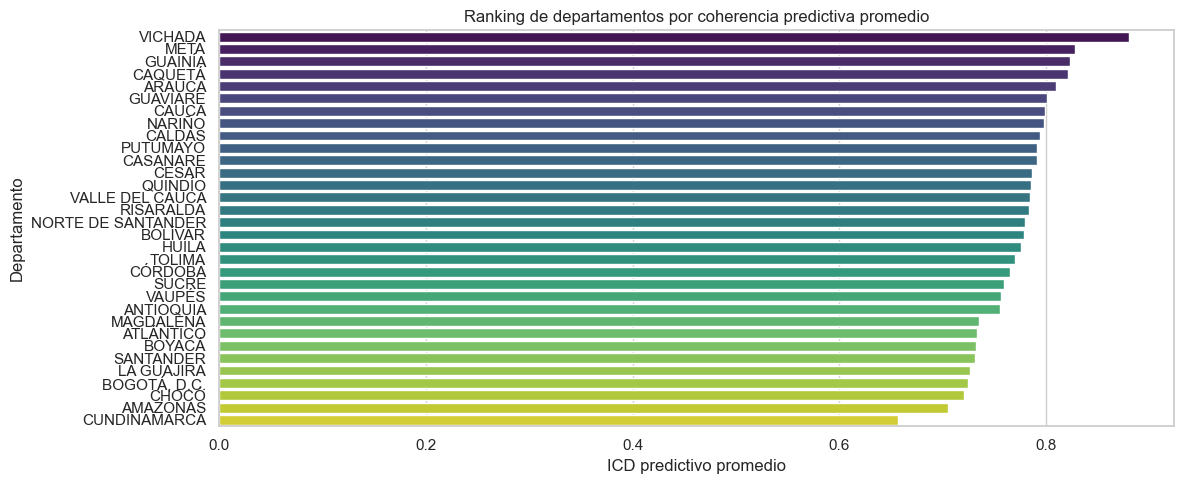

In [8]:
# Gráfico: ranking de departamentos por coherencia predictiva promedio
plt.figure(figsize=(12, 5))
sns.barplot(
    data=ranking_deptos,
    x="icd_predictivo_promedio",
    y=group_col,
    palette="viridis"
)
plt.xticks(rotation=0)
plt.xlabel("ICD predictivo promedio")
plt.ylabel("Departamento")
plt.title("Ranking de departamentos por coherencia predictiva promedio")
plt.tight_layout()
plt.show()


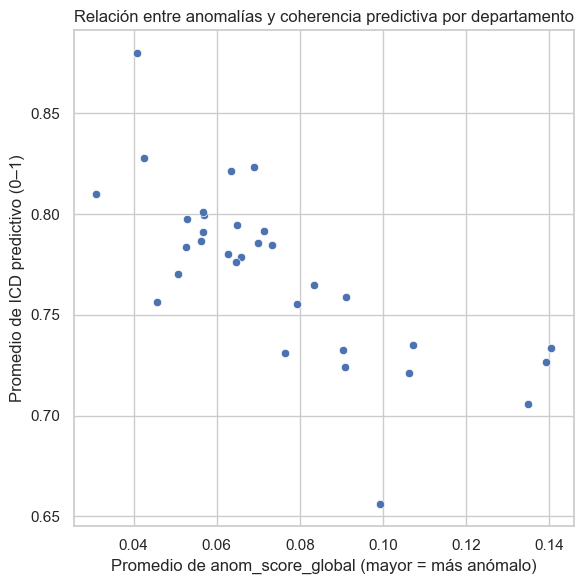

In [9]:
if "anom_score_global" in df.columns:

    # 1) Promedio de anomalías por departamento
    anom_por_depto = (
        df.groupby(group_col)["anom_score_global"]
          .mean()
          .reset_index(name="anom_mean")
    )

    # 2) Tomar coherencia promedio por departamento
    coh_por_depto = df_coh_depto[[group_col, "icd_predictivo_promedio"]].copy()
    coh_por_depto = coh_por_depto.rename(
        columns={"icd_predictivo_promedio": "icd_pred_mean"}
    )

    # 3) Unir ambos
    df_anom_coh = anom_por_depto.merge(coh_por_depto, on=group_col, how="inner")

    # 4) Graficar relación entre anomalía y coherencia
    plt.figure(figsize=(6, 6))
    sns.scatterplot(
        data=df_anom_coh,
        x="anom_mean",
        y="icd_pred_mean"
    )
    plt.xlabel("Promedio de anom_score_global (mayor = más anómalo)")
    plt.ylabel("Promedio de ICD predictivo (0–1)")
    plt.title("Relación entre anomalías y coherencia predictiva por departamento")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    df_anom_coh.sort_values("anom_mean", ascending=False).head()

else:
    print("No se encontró 'anom_score_global' en el dataframe. Asegúrate de haber corrido el libro 03.")


In [10]:
# Pasar de formato ancho (muchas columnas ICD) a largo:
# columnas: [departamento/dep_norm, icd_var, icd_value, variable]

df_long_icd = df_coh_depto.melt(
    id_vars=[group_col],
    value_vars=icd_cols,
    var_name="icd_var",
    value_name="icd_value"
)

# Quitar prefijo 'icd_predictivo_' del nombre
df_long_icd["variable"] = df_long_icd["icd_var"].str.replace("icd_predictivo_", "", regex=False)

df_long_icd.head()


,departamento,icd_var,icd_value,variable
0,AMAZONAS,icd_predictivo_ph_agua_suelo,0.734652,ph_agua_suelo
1,ANTIOQUIA,icd_predictivo_ph_agua_suelo,0.760544,ph_agua_suelo
2,ARAUCA,icd_predictivo_ph_agua_suelo,0.783347,ph_agua_suelo
3,ATLÁNTICO,icd_predictivo_ph_agua_suelo,0.599373,ph_agua_suelo
4,"BOGOTÁ, D.C.",icd_predictivo_ph_agua_suelo,0.710259,ph_agua_suelo


C:\Users\diego\AppData\Local\Temp\ipykernel_12120\3883242548.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


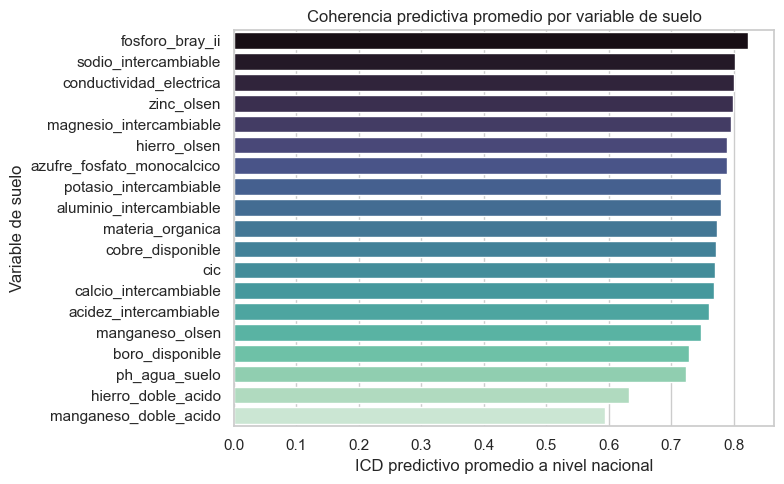

,variable,icd_value
0,fosforo_bray_ii,0.823050
1,sodio_intercambiable,0.801486
2,conductividad_electrica,0.800467
3,zinc_olsen,0.798448
4,magnesio_intercambiable,0.795659


In [11]:
coh_por_var = (
    df_long_icd
    .groupby("variable")["icd_value"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=coh_por_var,
    x="icd_value",
    y="variable",
    palette="mako"
)
plt.xlabel("ICD predictivo promedio a nivel nacional")
plt.ylabel("Variable de suelo")
plt.title("Coherencia predictiva promedio por variable de suelo")
plt.tight_layout()
plt.show()

coh_por_var.head()


In [12]:
# Guardar resumen en formato largo: departamento–variable–icd_predictivo

icd_depto_var_path = PROCESSED_DIR / "icd_predictivo_depto_variable.csv"
df_long_icd.to_csv(icd_depto_var_path, index=False, encoding="utf-8")

print("💾 Guardado resumen icd_predictivo por departamento y variable en:")
print("   ", icd_depto_var_path.resolve())


💾 Guardado resumen icd_predictivo por departamento y variable en:
    D:\ICD-SOIL\processed\icd_predictivo_depto_variable.csv
